## Final Project Submission

Please fill out:
* Student name: Aleyah Jane Nevado
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Hardik Idnani
* Blog post URL:


**Microsoft's Guide to Successful Studio Ventures by Genre and Gross Revenue Analysis**

**Overview**

An in-depth analysis of film genres in relation to their gross revenues, offering key insights for Microsoft as it contemplates entering the film production arena. These findings provide a roadmap for potential opportunities and challenges for the forthcoming movie studio venture.

**Business Problem**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I did an exploration on what types of films are currently doing the best at the box office. I then translated those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

**Data Understanding**

Avilable data from BOM (Box Office Mojo) and IMDB has been collected. The data files includes various metrics like: Gross revenue (domestic and foreign), Film genre, Audience ratings and vote counts, Movie titles, Release years and Production Studios.m

In [2]:
import pandas as pd

In [45]:
df_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

**Combined Gross Revenue**

This dataset provides information on movies, detailing their title, the studio that produced them, their domestic gross revenue, their foreign gross revenue, and the year of release.

I first figured out the oldest to the most recent year and the results are year 2010 as the oldest while year 2018 as the most recent. Knowing this information will make it easier to work on this dataframe.

I then summed up both the domestic and foreign gross that resulted on creating another key that is 'combined_gross'.

In [46]:
df_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [89]:
recentyear = df_gross['year'].max()
oldestyear = df_gross['year'].min()

print(f"The most recent year in the dataset is: {recentyear}")
print(f"The oldest year in the dataset is: {oldestyear}")

The most recent year in the dataset is: 2018
The oldest year in the dataset is: 2010


In [90]:
current_year = 2018  # Manually set, but you can also get it dynamically
start_year = current_year - 9  # to include the current year in the 10-year span

filtered_df = df_gross[df_gross['year'] >= start_year].copy()

# Convert the 'domestic_gross' and 'foreign_gross' columns to numeric
filtered_df['domestic_gross'] = pd.to_numeric(filtered_df['domestic_gross'], errors='coerce')
filtered_df['foreign_gross'] = pd.to_numeric(filtered_df['foreign_gross'], errors='coerce')

# Combine 'domestic_gross' and 'foreign_gross'
filtered_df['combined_gross'] = filtered_df['domestic_gross'] + filtered_df['foreign_gross']

# Sort by 'combined_gross' in descending order and select the top 10
top_10_movies = filtered_df.sort_values(by='combined_gross', ascending=False).head(10)

top_10_movies

,title,studio,domestic_gross,foreign_gross,year,combined_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


**Analysis and Visualization**

After the combined gross calculation, next thing I figured out are the "Top 10 Movies" that genereted the highest amount of revenue. This is now defined for the variable top_10_movies

On top of the most bankable movies, we also wanted to find out what are the top-performing movie studios.

Creating a graph visualization will make the findings to be more readable.


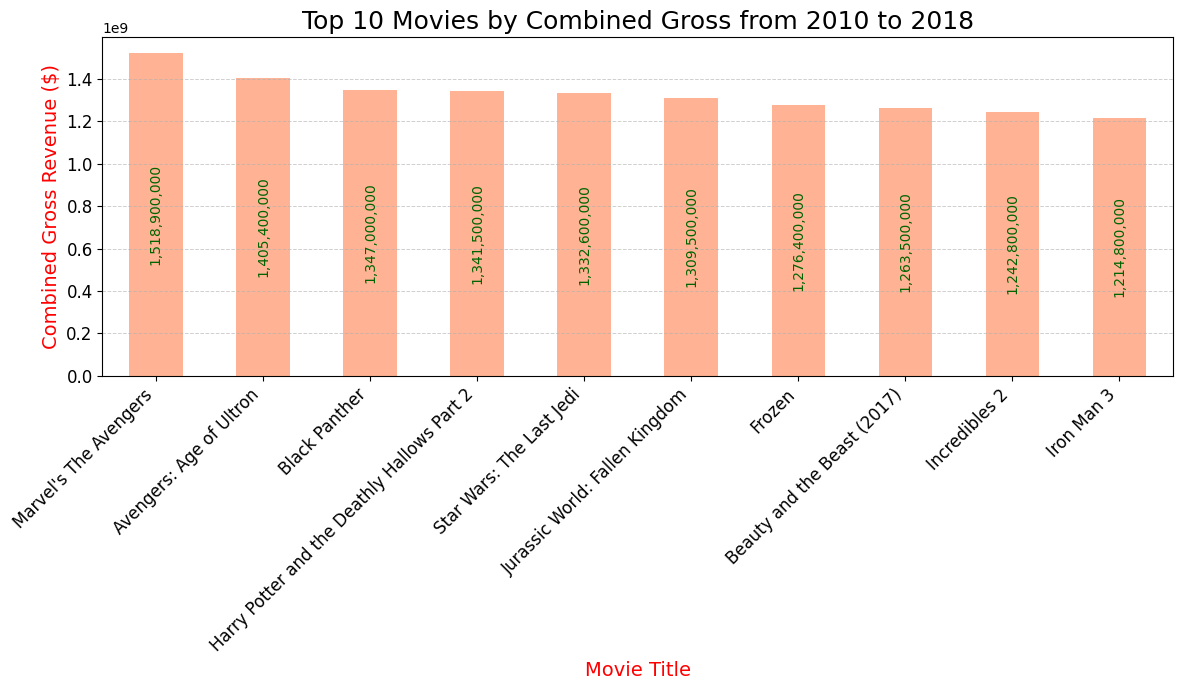

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

ax = top_10_movies.set_index('title')['combined_gross'].plot(kind='bar', color='lightsalmon', alpha=0.8)

plt.title('Top 10 Movies by Combined Gross from 2010 to 2018', fontsize=18)
plt.ylabel('Combined Gross Revenue ($)', color='red', fontsize=14)
plt.xlabel('Movie Title', color='red', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",  # Format the number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()/2),  # x, y position of the text
                ha='center', va='center', 
                fontsize=10, color='darkgreen',
                rotation=90  # Rotate the text 90 degrees
                )
    
# Adjust the layout for better display
plt.tight_layout()
plt.show()

In [92]:
# Ensure the 'domestic_gross' and 'foreign_gross' columns are numeric
filtered_df['domestic_gross'] = pd.to_numeric(filtered_df['domestic_gross'], errors='coerce')
filtered_df['foreign_gross'] = pd.to_numeric(filtered_df['foreign_gross'], errors='coerce')

# Group by studio, compute the sum of 'foreign_gross' and 'domestic_gross', and then sum them
studio_gross = filtered_df.groupby('studio').apply(lambda x: (x['domestic_gross'] + x['foreign_gross']).sum())

# Sort in descending order and get the top 10 studios
top_10_studios = studio_gross.sort_values(ascending=False).head(10)

top_10_studios

studio
BV         4.257488e+10
Fox        3.098037e+10
WB         3.079150e+10
Uni.       2.851551e+10
Sony       2.240472e+10
Par.       1.944420e+10
WB (NL)    1.031410e+10
LGF        8.467471e+09
LG/S       5.318924e+09
P/DW       5.076500e+09
dtype: float64

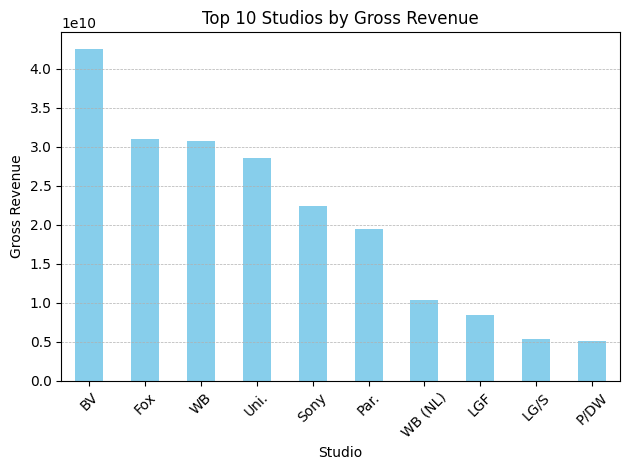

In [93]:
import matplotlib.pyplot as plt

top_10_studios.plot(kind='bar', color='skyblue')
plt.title('Top 10 Studios by Gross Revenue')
plt.ylabel('Gross Revenue')
plt.xlabel('Studio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**IMDB Datasets**

Aside from the gross revenues, we also filtered some information from IMDB sources that are available. We extracted these dataframes and here we can see that it includes essential information s like: genres, avragerating, numvotes year and movie titles.

In [131]:
df_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [112]:
df_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [132]:
df_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [114]:
df_ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


**Merging and Cleaning the Datasets**

Since we are working on two datasets, it was essential to merge both of them to make our life easier.

I did some work to figure out how much values are empty or null.

It's worth noting that some movies in the df_merge1(IMDB) dataset did not specify their genre. For the purpose of clarity, movies without specified genres, which formed 2% of the dataset, were excluded from the analysis.

In [133]:
# Merge df_basics and df_ratings
df_merge1 = pd.merge(df_basics, df_ratings, on='tconst', how='inner')

In [134]:
df_merge1.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


In [135]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [118]:
filtered_df = df_merge1[df_merge1['genres'].isnull()]

# Extract the primary_title column
primary_titles_with_nan_genres = filtered_df['primary_title']
len(primary_titles_with_nan_genres)

804

**Analysis**

Before starting the initial analysation, I first extracted the oldest and most recent movie year release. Knowing this information will help me navigate the span of this dataset.

I initially thought of combining the average rating and numvotes but then I realised that doing a separate reports for "averagerating" and "numvotes" will likely be a more prudent approach.

We'll be able to provide insights into both the quality (as perceived by the audience) and the popularity of the movies within each genre.

It was essential to split the genres first and dropping the movies that has a null value under the genre key.

We just simply want to know what are top 5 genres for each keys.

In [119]:
most_recent_year = df_merge1['start_year'].max()
oldest_year = df_merge1['start_year'].min()

print(f"The most recent year in the dataset is: {most_recent_year}")
print(f"The oldest year in the dataset is: {oldest_year}")

The most recent year in the dataset is: 2019
The oldest year in the dataset is: 2010


In [136]:
# Drop rows where genres is NaN
df_merge1 = df_merge1.dropna(subset=['genres'])

# Confirm that the NaN values have been dropped
print(df_merge1['genres'].isna().sum())

0


In [137]:
# Split the genres column into a list
df_merge1['genres'] = df_merge1['genres'].str.split(',')

# Explode the dataframe on the genres column
df_exploded = df_merge1.explode('genres')

print(df_exploded[['tconst', 'genres', 'averagerating', 'numvotes']].head(10))

      tconst     genres  averagerating  numvotes
0  tt0063540     Action            7.0        77
0  tt0063540      Crime            7.0        77
0  tt0063540      Drama            7.0        77
1  tt0066787  Biography            7.2        43
1  tt0066787      Drama            7.2        43
2  tt0069049      Drama            6.9      4517
3  tt0069204     Comedy            6.1        13
3  tt0069204      Drama            6.1        13
4  tt0100275     Comedy            6.5       119
4  tt0100275      Drama            6.5       119


In [140]:
# Calculate the average rating for each genre and get the top 5
avg_rating = df_exploded.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(5)

# Calculate the total number of votes for each genre and get the top 5
total_votes = df_exploded.groupby('genres')['numvotes'].sum().sort_values(ascending=False).head(5)

print(avg_rating)
print(total_votes)

genres
Short          8.800000
Documentary    7.332090
Game-Show      7.300000
News           7.271330
Biography      7.162274
Name: averagerating, dtype: float64
genres
Drama        119567500
Action       101161682
Adventure     84232589
Comedy        74305805
Thriller      48155313
Name: numvotes, dtype: int64


**Visualization and Side by side Comparison**

The table below was made to have a clear insight comparison between average rating and total votes.

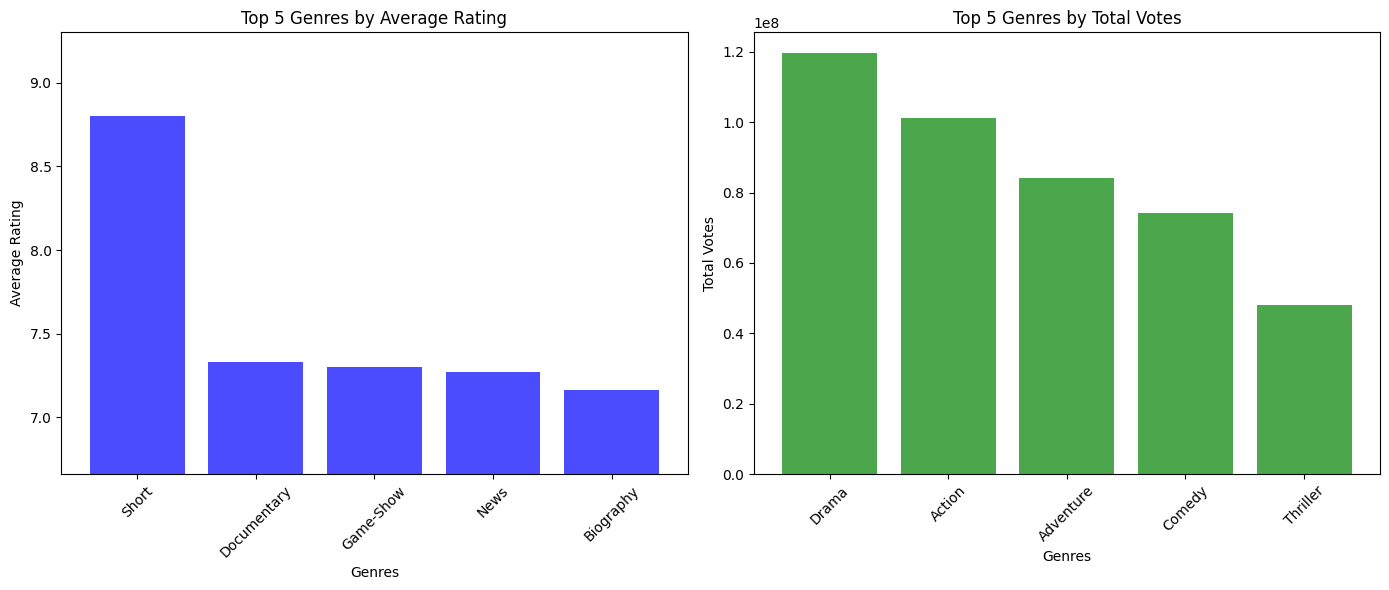

In [143]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for averagerating
axes[0].bar(avg_rating.index, avg_rating.values, color='blue', alpha=0.7)
axes[0].set_title('Top 5 Genres by Average Rating')
axes[0].set_ylabel('Average Rating')
axes[0].set_xlabel('Genres')
axes[0].set_ylim([min(avg_rating.values) - 0.5, max(avg_rating.values) + 0.5])
axes[0].tick_params(axis='x', rotation=45)

# Plot for numvotes
axes[1].bar(total_votes.index, total_votes.values, color='green', alpha=0.7)
axes[1].set_title('Top 5 Genres by Total Votes')
axes[1].set_ylabel('Total Votes')
axes[1].set_xlabel('Genres')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()